In [1]:
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import pickle as pkl
import nltk
import re, string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.pipeline import Pipeline

In [2]:
from Limpieza import Limpieza

In [3]:
# Crear el Pipeline con las transformaciones necesarias
pipeline = Pipeline([
    ('preprocessor', Limpieza()),
    ('vectorizer', HashingVectorizer(n_features=2**16)),
    ('classifier', RandomForestClassifier(random_state=3))
])

In [4]:
movies_df = pd.read_csv('../data/MovieReviews.csv', sep = ',')
movies_df.head()

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [5]:
X_train, X_test, y_train, y_test = train_test_split(movies_df['review_es'], movies_df['sentimiento'], test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000,) (1000,) (4000,) (1000,)


In [6]:
pipeline.fit(X_train, y_train)

Limpieza de datos...
Transformando texto...
Se removieron los caracteres ASCII
Se cambiaron las mayusculas por minusculas
Se eliminaron los signos de puntuacion
Se reemplazaron los numeros por su equivalente en palabras
Se eliminaron las stopwords


Pipeline(steps=[('preprocessor', Limpieza()),
                ('vectorizer', HashingVectorizer(n_features=65536)),
                ('classifier', RandomForestClassifier(random_state=3))])

In [7]:
y_train_hash_predict = pipeline.predict(X_train)
y_test_hash_predict = pipeline.predict(X_test)

Transformando texto...
Se removieron los caracteres ASCII
Se cambiaron las mayusculas por minusculas
Se eliminaron los signos de puntuacion
Se reemplazaron los numeros por su equivalente en palabras
Se eliminaron las stopwords
Transformando texto...
Se removieron los caracteres ASCII
Se cambiaron las mayusculas por minusculas
Se eliminaron los signos de puntuacion
Se reemplazaron los numeros por su equivalente en palabras
Se eliminaron las stopwords


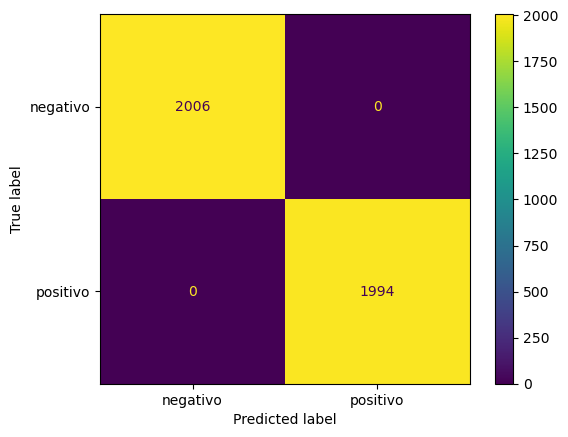

In [8]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_hash_predict)

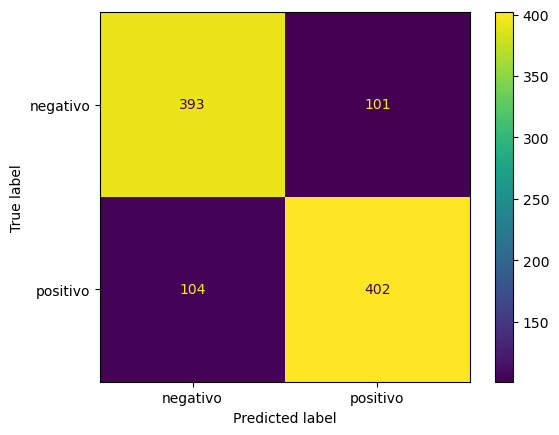

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_hash_predict)

In [10]:
rutaPipeline =  "pipeline.joblib"
dump(pipeline, rutaPipeline)

rutaPipeline =  "pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)